# Exploratory Data Analysis

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('vgsales_webscrap.csv', index_col = 0)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


C:\Users\ttttt\AppData\Local\Temp\ipykernel_16236\4030683980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


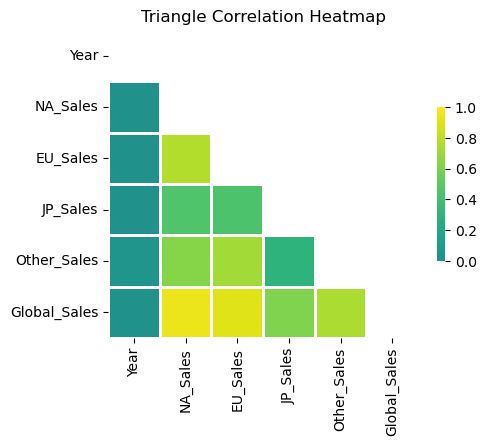

In [23]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, mask=mask, center = 0, vmin= 0, vmax = 1, linewidths=1, cbar_kws={"shrink": .5}, cmap= 'viridis' )
plt.title('Triangle Correlation Heatmap');

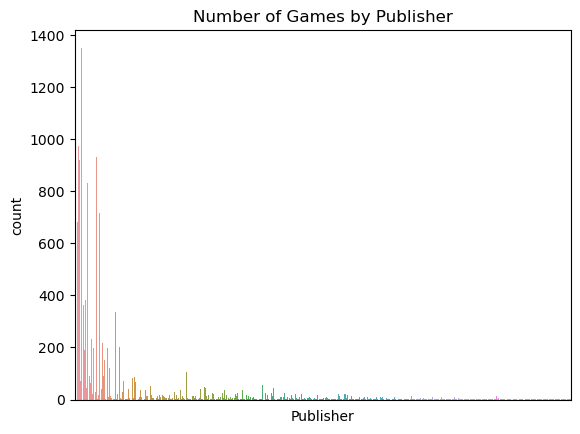

In [24]:
plt.title('Number of Games by Publisher')
sns.countplot(x = data.Publisher)
plt.xticks([]);

C:\Users\ttttt\AppData\Local\Temp\ipykernel_16236\3339911960.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_for_graph = data.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head()


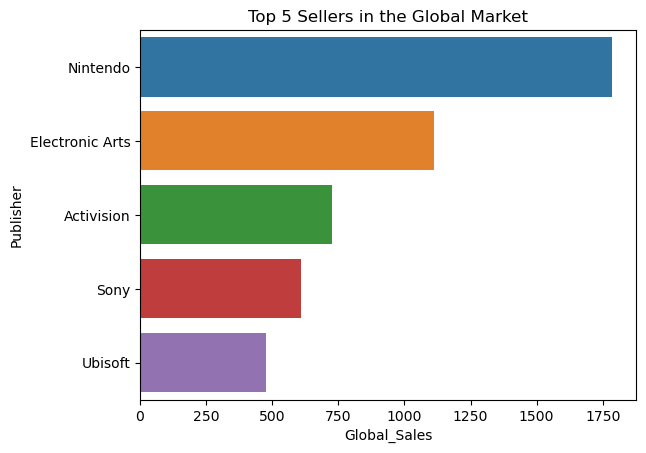

In [25]:
data_for_graph = data.groupby('Publisher').sum().sort_values('Global_Sales', ascending=False).head()
data_for_graph = data_for_graph.rename(index = {'Sony Computer Entertainment' : 'Sony'})

sns.barplot(y = data_for_graph.index ,x = data_for_graph.Global_Sales)
plt.title('Top 5 Sellers in the Global Market');

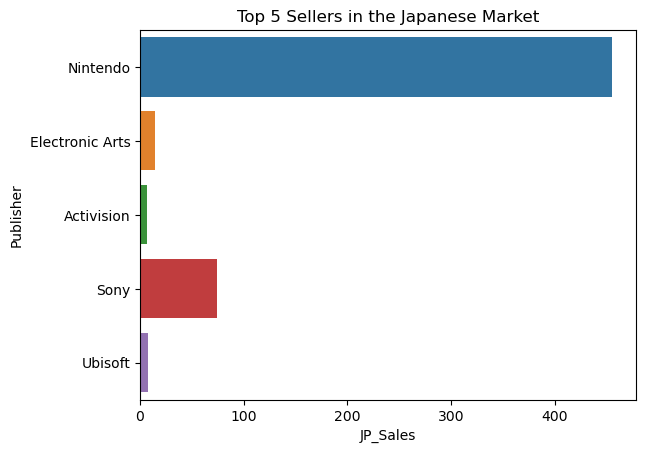

In [26]:
sns.barplot(y = data_for_graph.index ,x = data_for_graph.JP_Sales)
plt.title('Top 5 Sellers in the Japanese Market');


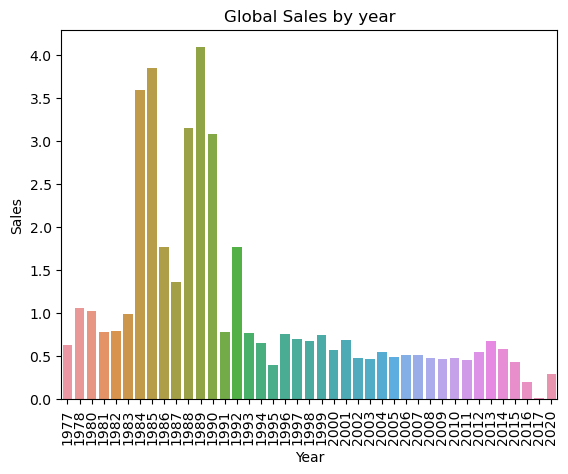

In [27]:
Yearint = data.Year.dropna().astype('int')

fig, ax = plt.subplots()

sns.barplot(y = data.Global_Sales, x = Yearint, errorbar = None)
plt.ylabel('Sales')
plt.xlabel('Year')
plt.title('Global Sales by year')
plt.ylim()
plt.xticks(rotation=90);


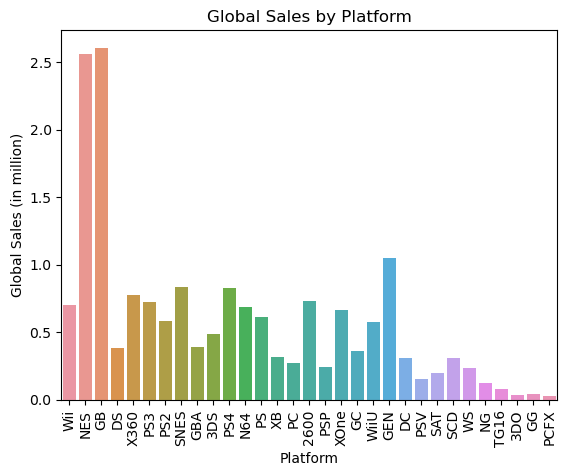

In [28]:
sns.barplot(x = data.Platform, y = data.Global_Sales, errorbar = None)
plt.ylabel('Global Sales (in million)')
plt.xticks(rotation = 90)
plt.title('Global Sales by Platform');

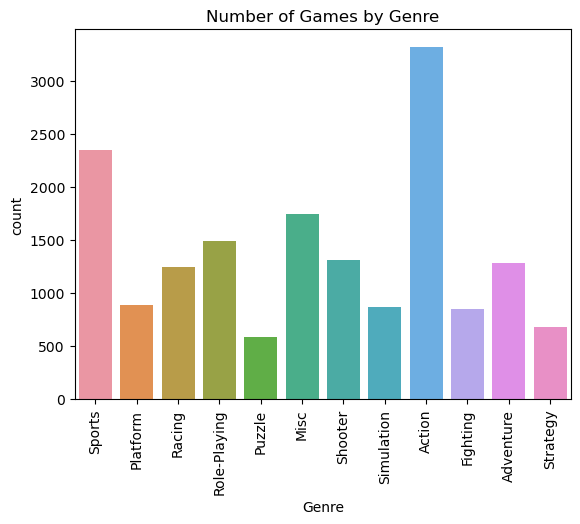

In [29]:
sns.countplot(x = data.Genre)
plt.xticks(rotation=90)
plt.title('Number of Games by Genre');

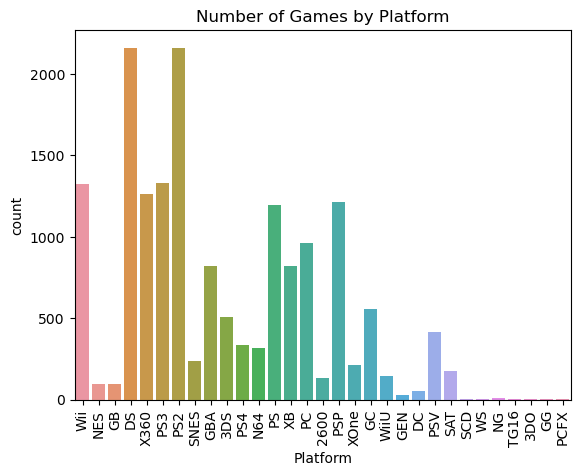

In [30]:
sns.countplot(x = data.Platform)
plt.xticks(rotation=90)
plt.title('Number of Games by Platform');